In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
spotify_df = pd.read_csv("data/data.csv")
spotify_df.columns
spotify_df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [3]:
spotify_df["year"] = pd.to_numeric(spotify_df["year"])

In [6]:
spotify_df = spotify_df.drop_duplicates(subset=["name", "artists"]).reset_index().drop('index', axis=1)
spotify_df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


### Data Exploration

##### Music Over Time

/Users/aditya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='decade', ylabel='count'>

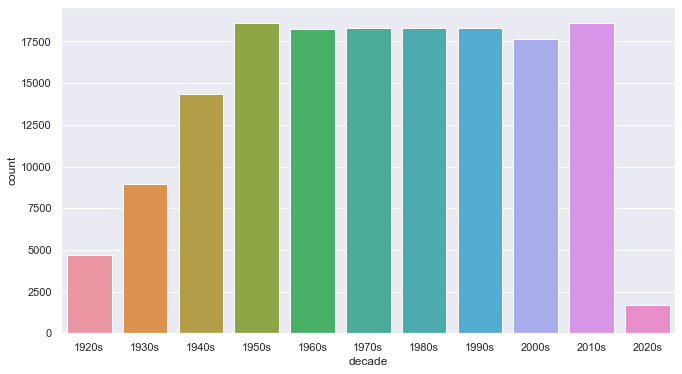

In [7]:
def get_decade(year):
    
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    
    return decade

spotify_df['decade'] = spotify_df['year'].apply(get_decade)

sns.set(rc={'figure.figsize':(11 ,6)})
sns.countplot(spotify_df['decade'])

<AxesSubplot:xlabel='year', ylabel='tempo'>

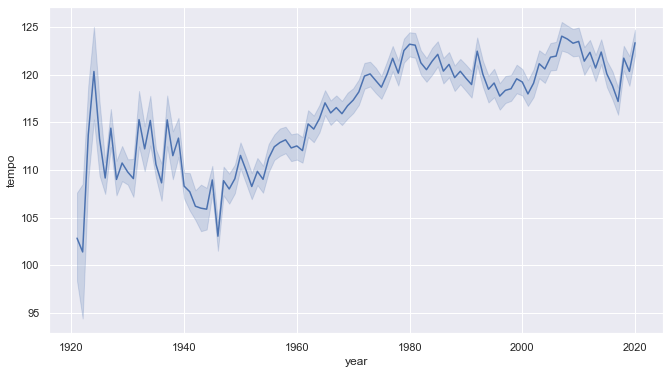

In [8]:
sns.lineplot(x='year', y='tempo', data=spotify_df)

### Model Building

In [9]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

In [10]:
df_features = spotify_df[["id", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence"]]
df_features.head()

,id,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,4BJqT0PrAfrxzMOxytFOIz,0.982,0.279,0.211,0.878000,0.665,-20.096,0.0366,80.954,0.0594
1,7xPhfUan2yNtyFG0cUWkt8,0.732,0.819,0.341,0.000000,0.160,-12.441,0.4150,60.936,0.9630
2,1o6I8BglA6ylDMrIELygv1,0.961,0.328,0.166,0.913000,0.101,-14.850,0.0339,110.339,0.0394
3,3ftBPsC5vPBKxYSee08FDH,0.967,0.275,0.309,0.000028,0.381,-9.316,0.0354,100.109,0.1650
4,4d6HGyGT8e121BsdKmw9v6,0.957,0.418,0.193,0.000002,0.229,-10.096,0.0380,101.665,0.2530


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [12]:
df_features.index = df_features["id"]
df_features.drop('id', axis=1, inplace=True)
X_scaled = scaler.fit_transform(df_features)

/Users/aditya/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [13]:
df_features.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
id,,,,,,,,,
4BJqT0PrAfrxzMOxytFOIz,0.982,0.279,0.211,0.878000,0.665,-20.096,0.0366,80.954,0.0594
7xPhfUan2yNtyFG0cUWkt8,0.732,0.819,0.341,0.000000,0.160,-12.441,0.4150,60.936,0.9630
1o6I8BglA6ylDMrIELygv1,0.961,0.328,0.166,0.913000,0.101,-14.850,0.0339,110.339,0.0394
3ftBPsC5vPBKxYSee08FDH,0.967,0.275,0.309,0.000028,0.381,-9.316,0.0354,100.109,0.1650
4d6HGyGT8e121BsdKmw9v6,0.957,0.418,0.193,0.000002,0.229,-10.096,0.0380,101.665,0.2530


In [14]:
model = NearestNeighbors(algorithm='kd_tree', n_neighbors=20)

We have made n_neighbors = 20 so that we get the maximum number of nearest neighbors. This essentially prepares us to give up to 20 different recommendations to our users!

In [15]:
sparse_mat_songs = csr_matrix(df_features.values)

In [16]:
%timeit model.fit(sparse_mat_songs)

/Users/aditya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "


4.28 ms ± 152 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
def recommend(id, model, number_of_recommendations):
    query = df_features.loc[id].to_numpy().reshape(1,-1)
    print('Searching for recommendations, please wait...')
    print('                            Recommendations                           ')
    print('----------------------------------------------------------------------')
    distances, indices = model.kneighbors(query,n_neighbors = number_of_recommendations)
    # print(distances)
    # print(indices)
    try:
        for i in indices:
            print(spotify_df[['name','artists']].loc[i].where(spotify_df['id']!=id).dropna())
    except:
        print("Some songs not found in DB, will be updated soon")

In [18]:
def test_recs(num_recs):
    name = input('Enter song title: ')
    print('Search results: ')
    print(spotify_df[['artists','name']].where(spotify_df['name'] == name).dropna())

    ind = int(input('Enter the index value of your desired song: '))
    id = spotify_df['id'].loc[ind]

    song = spotify_df['name'].loc[ind]
    artists = spotify_df['artists'].loc[ind]

    print('The inputted song selected is ', song, 'by', artists)

    #nor = int(input('Enter number of recommendations: '))

    recommend(id, model, num_recs)

In [19]:
test_recs(20)

Search results: 
                        artists               name
16022                 ['Queen']  Bohemian Rhapsody
84229        ['Rockabye Baby!']  Bohemian Rhapsody
115174  ['Panic! At The Disco']  Bohemian Rhapsody
The inputted song selected is  Bohemian Rhapsody by ['Queen']
Searching for recommendations, please wait...
                            Recommendations                           
----------------------------------------------------------------------
                                                     name  \
61421                Heart of the Sunrise - 2008 Remaster   
12721                              Have I Told You Lately   
29878                     All Cried Out (with Full Force)   
65465                                    Does He Love You   
150729                                       C'est Le Bon   
62370                          Still the One - 45 Version   
76563                                          The Weight   
139651                                   

In [ ]:
test_recs(7)